In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from bs4 import BeautifulSoup

In [42]:
df = pd.read_csv('/content/train.csv')

In [43]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [45]:
df = df.sample(30000, random_state = 2)

In [46]:
def preprocess(q):

    q = str(q).lower().strip()

    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')

    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')

    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)

    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")

    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()

    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()


    return q

In [47]:
preprocess("I am Zeyam Ali matharu @ g,<p>ail$%$00</p>")

'i am zeyam ali matharu at g ail dollar percent dollar 00'

In [48]:
df['question1'] = df['question1'].apply(preprocess)
df['question2'] = df['question2'].apply(preprocess)

<ipython-input-46-2d29c0029158>:161: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  q = BeautifulSoup(q)


In [49]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0


In [50]:
#no.of charchters in each question
df['q1-len'] = df['question1'].str.len()
df['q2_len'] = df['question2'].str.len()

In [51]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1-len,q2_len
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,48,56
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,104,119
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,58,145
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49


In [52]:
#words in each question
def words(s):
  list = []
  for word in s.split():
    list.append(word)



  return list

In [53]:
df['q1_words'] = pd.DataFrame({'q1_words': df['question1'].apply(words)})
df['q2_words'] = pd.DataFrame({'q2_words': df['question2'].apply(words)})

In [54]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1-len,q2_len,q1_words,q2_words
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,"[what, is, the, best, marketing, automation, t...","[what, is, the, best, marketing, automation, t..."
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,48,56,"[i, am, poor, but, i, want, to, invest, what, ...","[i, am, quite, poor, and, i, want, to, be, ver..."
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,104,119,"[i, am, from, india, and, live, abroad, i, met...","[t, i, e, t, to, thapar, university, to, thapa..."
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,58,145,"[why, do, so, many, people, in, the, u, s, hat...","[my, boyfriend, doesnt, feel, guilty, when, he..."
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,"[consequences, of, bhopal, gas, tragedy]","[what, was, the, reason, behind, the, bhopal, ..."


In [55]:
#No.of words in each question
def no_of_words(s):
  list = []
  for word in s.split():
    list.append(word)



  return len(list)

In [56]:
s = "i am zeyam ali"
no_of_words(s)

4

In [57]:
df['no_q1_words'] = pd.DataFrame(df['question1'].apply(no_of_words))
df['no_q2_words'] = pd.DataFrame(df['question2'].apply(no_of_words))


In [58]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1-len,q2_len,q1_words,q2_words,no_q1_words,no_q2_words
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,"[what, is, the, best, marketing, automation, t...","[what, is, the, best, marketing, automation, t...",13,13
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,48,56,"[i, am, poor, but, i, want, to, invest, what, ...","[i, am, quite, poor, and, i, want, to, be, ver...",12,15
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,104,119,"[i, am, from, india, and, live, abroad, i, met...","[t, i, e, t, to, thapar, university, to, thapa...",26,20
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,58,145,"[why, do, so, many, people, in, the, u, s, hat...","[my, boyfriend, doesnt, feel, guilty, when, he...",13,30
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,"[consequences, of, bhopal, gas, tragedy]","[what, was, the, reason, behind, the, bhopal, ...",5,9


In [59]:
#common words
def common_words(w):
    w1 = set(map(lambda word: word.lower().strip() , w['question1'].split(" ")))
    w2 = set(map(lambda word : word.lower().strip() , w['question2'].split(" ") ))
    return len(w1 & w2)

In [60]:
df['common_words'] = df.apply(common_words, axis =1)

In [61]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1-len,q2_len,q1_words,q2_words,no_q1_words,no_q2_words,common_words
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,"[what, is, the, best, marketing, automation, t...","[what, is, the, best, marketing, automation, t...",13,13,12
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,48,56,"[i, am, poor, but, i, want, to, invest, what, ...","[i, am, quite, poor, and, i, want, to, be, ver...",12,15,8
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,104,119,"[i, am, from, india, and, live, abroad, i, met...","[t, i, e, t, to, thapar, university, to, thapa...",26,20,4
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,58,145,"[why, do, so, many, people, in, the, u, s, hat...","[my, boyfriend, doesnt, feel, guilty, when, he...",13,30,1
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,"[consequences, of, bhopal, gas, tragedy]","[what, was, the, reason, behind, the, bhopal, ...",5,9,3


In [62]:
df.head(398783)

,id,qid1,qid2,question1,question2,is_duplicate,q1-len,q2_len,q1_words,q2_words,no_q1_words,no_q2_words,common_words
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,"[what, is, the, best, marketing, automation, t...","[what, is, the, best, marketing, automation, t...",13,13,12
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,48,56,"[i, am, poor, but, i, want, to, invest, what, ...","[i, am, quite, poor, and, i, want, to, be, ver...",12,15,8
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,104,119,"[i, am, from, india, and, live, abroad, i, met...","[t, i, e, t, to, thapar, university, to, thapa...",26,20,4
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,58,145,"[why, do, so, many, people, in, the, u, s, hat...","[my, boyfriend, doesnt, feel, guilty, when, he...",13,30,1
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,"[consequences, of, bhopal, gas, tragedy]","[what, was, the, reason, behind, the, bhopal, ...",5,9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
243932,243932,26193,356455,what are some good web scraping tutorials,what are some good web scraping programs,1,41,40,"[what, are, some, good, web, scraping, tutorials]","[what, are, some, good, web, scraping, programs]",7,7,6
91980,91980,154063,154064,can i apply for internet banking in sbi withou...,i have internet banking kit of sbi but it is n...,0,67,61,"[can, i, apply, for, internet, banking, in, sb...","[i, have, internet, banking, kit, of, sbi, but...",12,13,4
266955,266955,133017,384210,how much he laundry detergent do you use in a ...,can i use regular dawn dishsoap in my dishwash...,0,72,97,"[how, much, he, laundry, detergent, do, you, u...","[can, i, use, regular, dawn, dishsoap, in, my,...",14,17,6
71112,71112,122427,122428,what is the best way to understand and learn m...,what are some of the best ways to learn math,1,50,44,"[what, is, the, best, way, to, understand, and...","[what, are, some, of, the, best, ways, to, lea...",10,10,5


In [63]:
def total_words(s):
  w1 = set(map(lambda word: word.lower().strip(), s['question1'].split(" ")))
  w2 = set(map(lambda word: word.lower().strip(), s['question2'].split(" ")))
  return (len(w1) + len(w2))


In [64]:
df['total_word_in_pair'] = df.apply(total_words,axis =1)

In [65]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1-len,q2_len,q1_words,q2_words,no_q1_words,no_q2_words,common_words,total_word_in_pair
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,"[what, is, the, best, marketing, automation, t...","[what, is, the, best, marketing, automation, t...",13,13,12,26
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,48,56,"[i, am, poor, but, i, want, to, invest, what, ...","[i, am, quite, poor, and, i, want, to, be, ver...",12,15,8,24
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,104,119,"[i, am, from, india, and, live, abroad, i, met...","[t, i, e, t, to, thapar, university, to, thapa...",26,20,4,38
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,58,145,"[why, do, so, many, people, in, the, u, s, hat...","[my, boyfriend, doesnt, feel, guilty, when, he...",13,30,1,34
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,"[consequences, of, bhopal, gas, tragedy]","[what, was, the, reason, behind, the, bhopal, ...",5,9,3,13


In [66]:
df['word_share'] = round(df['common_words']/df['total_word_in_pair'],2)

In [67]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1-len,q2_len,q1_words,q2_words,no_q1_words,no_q2_words,common_words,total_word_in_pair,word_share
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,"[what, is, the, best, marketing, automation, t...","[what, is, the, best, marketing, automation, t...",13,13,12,26,0.46
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,48,56,"[i, am, poor, but, i, want, to, invest, what, ...","[i, am, quite, poor, and, i, want, to, be, ver...",12,15,8,24,0.33
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,104,119,"[i, am, from, india, and, live, abroad, i, met...","[t, i, e, t, to, thapar, university, to, thapa...",26,20,4,38,0.11
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,58,145,"[why, do, so, many, people, in, the, u, s, hat...","[my, boyfriend, doesnt, feel, guilty, when, he...",13,30,1,34,0.03
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,"[consequences, of, bhopal, gas, tragedy]","[what, was, the, reason, behind, the, bhopal, ...",5,9,3,13,0.23


# Advance Features  

In [68]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [69]:
# Advanced Features
from nltk.corpus import stopwords

def fetch_token_features(row):

    q1 = row['question1']
    q2 = row['question2']

    SAFE_DIV = 0.0001

    STOP_WORDS = stopwords.words("english")

    token_features = [0.0]*8

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])

    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])

    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))

    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))

    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))


    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])

    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])

    return token_features

In [70]:
token_features = df.apply(fetch_token_features, axis=1)

df["cwc_min"]       = list(map(lambda x: x[0], token_features))
df["cwc_max"]       = list(map(lambda x: x[1], token_features))
df["csc_min"]       = list(map(lambda x: x[2], token_features))
df["csc_max"]       = list(map(lambda x: x[3], token_features))
df["ctc_min"]       = list(map(lambda x: x[4], token_features))
df["ctc_max"]       = list(map(lambda x: x[5], token_features))
df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [71]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate,q1-len,q2_len,q1_words,q2_words,...,total_word_in_pair,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
79598,79598,135489,135490,why did muslims want partition of india,what were the reasons behind the indian pakist...,0,39,76,"[why, did, muslims, want, partition, of, india]","[what, were, the, reasons, behind, the, indian...",...,18,0.17,0.499988,0.285710,0.333322,0.249994,0.428565,0.249998,1.0,0.0
43917,43917,78928,78929,how do i increase testosterone,how can i increase testosterone,1,30,31,"[how, do, i, increase, testosterone]","[how, can, i, increase, testosterone]",...,10,0.40,0.999950,0.999950,0.666644,0.666644,0.799984,0.799984,1.0,1.0
312096,312096,339626,436492,what advantages do men have over women,what advantages do men have that women do not ...,1,38,105,"[what, advantages, do, men, have, over, women]","[what, advantages, do, men, have, that, women,...",...,16,0.38,0.999967,0.999967,0.749981,0.499992,0.857131,0.285713,0.0,1.0
158255,158255,25162,26187,what are the safety precautions on handling sh...,what are the safety precautions on handling sh...,1,83,85,"[what, are, the, safety, precautions, on, hand...","[what, are, the, safety, precautions, on, hand...",...,26,0.46,0.857131,0.857131,0.999983,0.999983,0.857137,0.857137,0.0,1.0
105583,105583,174083,174084,what we did not learn from college but wish we,what you have learned from college,0,46,34,"[what, we, did, not, learn, from, college, but...","[what, you, have, learned, from, college]",...,15,0.20,0.499975,0.333322,0.499988,0.333328,0.499992,0.299997,0.0,1.0
25656,25656,47800,47801,what happened to people who believed in the 20...,what happened to people who sold off all their...,1,59,105,"[what, happened, to, people, who, believed, in...","[what, happened, to, people, who, sold, off, a...",...,28,0.29,0.599988,0.374995,0.999980,0.499995,0.799992,0.399998,0.0,1.0
20841,20841,39288,39289,what is your review of hell to pay 2005 movie,what is your review of hell 2005 movie,0,46,39,"[what, is, your, review, of, hell, to, pay, 20...","[what, is, your, review, of, hell, 2005, movie]",...,20,0.45,0.999975,0.799984,0.999975,0.799984,0.999988,0.799992,1.0,1.0
339355,339355,467006,467007,if you are an english language learner would y...,i have a score of 318 159 159 4 0 in the gre...,0,98,146,"[if, you, are, an, english, language, learner,...","[i, have, a, score, of, 318, 159, 159, 4, 0, i...",...,43,0.09,0.000000,0.000000,0.571420,0.333331,0.235293,0.125000,0.0,0.0
39956,39956,45504,72367,how do i transfer whatsapp messages from andro...,how can i transfer whatsapp from an android to...,0,55,62,"[how, do, i, transfer, whatsapp, messages, fro...","[how, can, i, transfer, whatsapp, from, an, an...",...,22,0.32,0.599988,0.599988,0.799984,0.571420,0.699993,0.583328,0.0,1.0
50267,50267,89329,14027,can we find our sbi account number from our re...,how do you find out who a phone or cell phone ...,0,68,63,"[can, we, find, our, sbi, account, number, fro...","[how, do, you, find, out, who, a, phone, or, c...",...,23,0.09,0.399992,0.333328,0.000000,0.000000,0.166665,0.142856,0.0,0.0


#length features

In [72]:
!pip install Distance
import distance


In [73]:
import distance

def fetch_length_features(row):

    q1 = row['question1']
    q2 = row['question2']

    length_features = [0.0]*3

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))

    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2

    strs = list(distance.lcsubstrings(q1, q2))
    if len(strs) > 0:
     length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)

    return length_features




In [74]:
length_features = df.apply(fetch_length_features, axis=1)

df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
df['mean_len'] = list(map(lambda x: x[1], length_features))
df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [75]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1-len,q2_len,q1_words,q2_words,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,"[what, is, the, best, marketing, automation, t...","[what, is, the, best, marketing, automation, t...",...,0.874989,0.999980,0.999980,0.923070,0.923070,1.0,1.0,0.0,13.0,0.855263
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,48,56,"[i, am, poor, but, i, want, to, invest, what, ...","[i, am, quite, poor, and, i, want, to, be, ver...",...,0.499988,0.714276,0.624992,0.583328,0.466664,1.0,1.0,3.0,13.5,0.224490
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,104,119,"[i, am, from, india, and, live, abroad, i, met...","[t, i, e, t, to, thapar, university, to, thapa...",...,0.000000,0.428565,0.272725,0.149999,0.115384,0.0,0.0,6.0,23.0,0.047619
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,58,145,"[why, do, so, many, people, in, the, u, s, hat...","[my, boyfriend, doesnt, feel, guilty, when, he...",...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,17.0,21.5,0.050847
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,"[consequences, of, bhopal, gas, tragedy]","[what, was, the, reason, behind, the, bhopal, ...",...,0.599988,0.000000,0.000000,0.599988,0.333330,1.0,0.0,4.0,7.0,0.542857


In [76]:
# Fuzzy Features
!pip install fuzzywuzzy
# Install the fuzzywuzzy library.
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):

    q1 = row['question1']
    q2 = row['question2']

    fuzzy_features = [0.0]*4

    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features



/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [77]:
fuzzy_features = df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

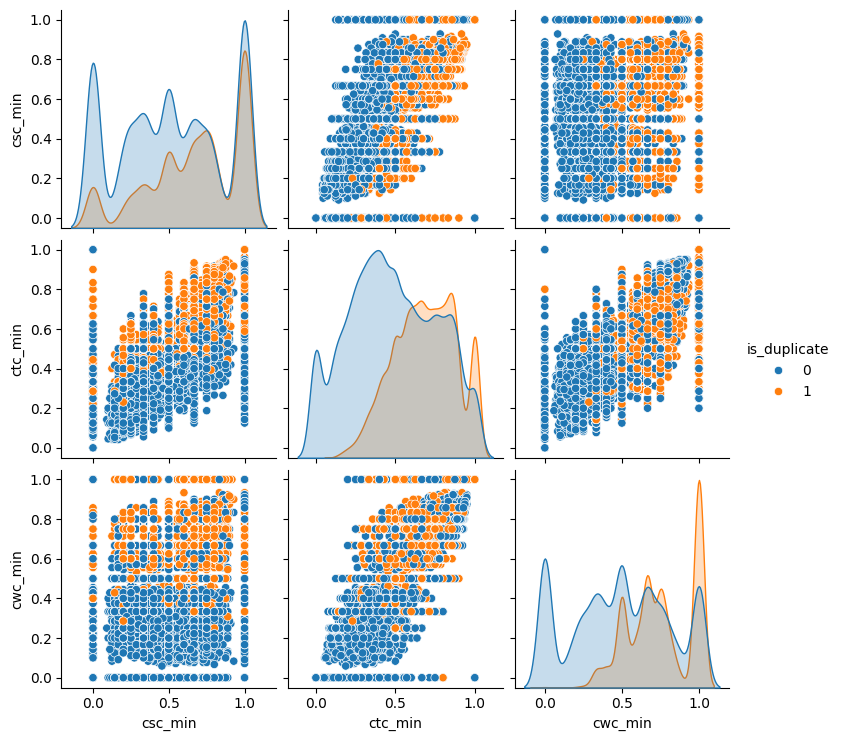

In [80]:
sns.pairplot(df[['csc_min','ctc_min','cwc_min', 'is_duplicate']], hue ='is_duplicate')

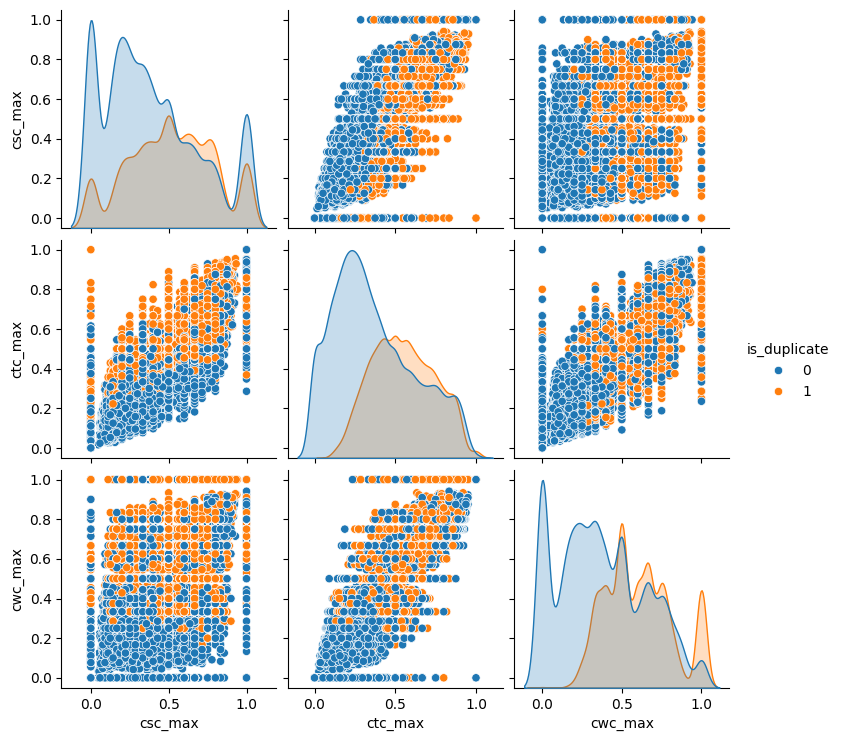

In [81]:
sns.pairplot(df[['csc_max','ctc_max','cwc_max', 'is_duplicate']], hue = 'is_duplicate')

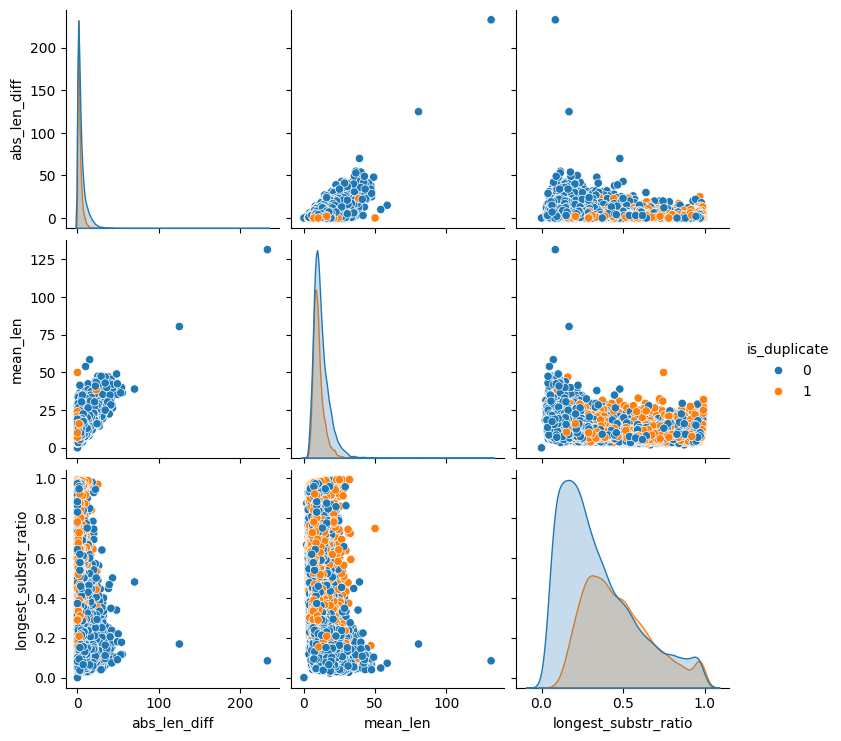

In [82]:
sns.pairplot(df[['abs_len_diff','mean_len','longest_substr_ratio','is_duplicate']], hue = 'is_duplicate')

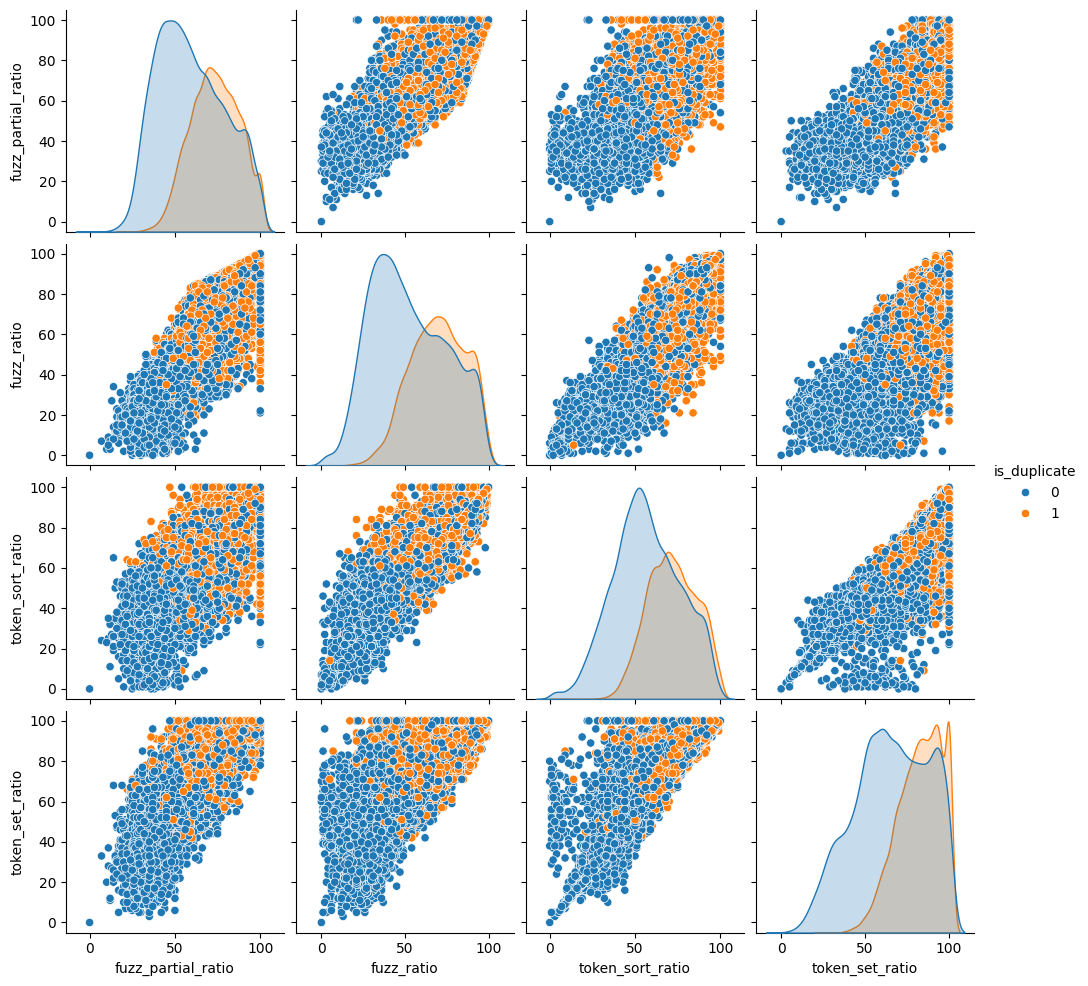

In [84]:
sns.pairplot(df[['fuzz_partial_ratio','fuzz_ratio','token_sort_ratio','token_set_ratio','is_duplicate']], hue = 'is_duplicate')

#Bag of Words using CountVectorizer

In [85]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=3000)

questions = list(df['question1']) + list(df['question2'])

arr1,arr2 = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [86]:
temp1 = pd.DataFrame(arr1, index = df.index)
temp2 = pd.DataFrame(arr2, index = df.index)
ques_df = pd.concat([temp1,temp2] , axis =1)

In [87]:
df = pd.concat([df,ques_df], axis =1)